<a href="https://colab.research.google.com/github/malcolmlett/ml-learning/blob/main/Difficult_to_train_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks that are difficult to train
This notebook explores some cases where the network struggles to find a near optimum solution. In some cases, the optimum solution is easy to derive analytically.

This hopefully highlights some of the methods available to troubleshoot and solve these sorts of problems.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


# Complex Curve Fitting
This example illustrates that although a very simple solution is available, the network struggles to find it. The solution lies in the "curve" interpretation of relu activation (see `Weight visualisations v2.ipynb`).

In [2]:
# First, some helper methods
def plot_fit(model, x):
  y_predict = model.predict(x)

  x_wide = np.linspace(-100, 200, 1000)
  y_wide_predict = model.predict(x_wide)

  plt.figure(layout='constrained')
  plt.subplot(1,2,1)
  plt.plot(x,y, color='blue', label="Truth")
  plt.plot(x,y_predict, color='orange',label="Prediction")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(x_wide,y_wide_predict, color='orange', label="Prediction")
  plt.legend()

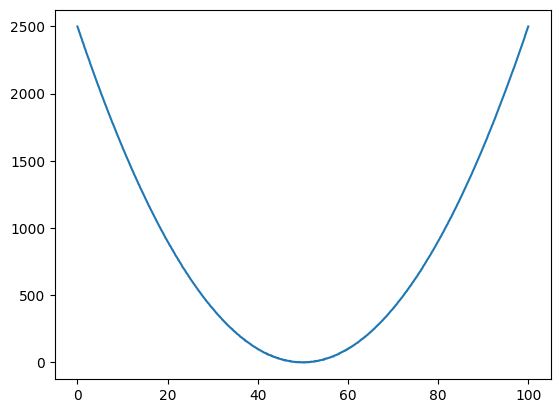

In [3]:
# First - Define simple quadratic curve to fit
x = np.linspace(0.0, 100.0, 1000)
y = (x-50)**2 + np.random.normal(size=(1000,))
plt.plot(x,y)

In [ ]:
# WIP
# Let's see what happens if we pre-compute the ideal weights and biases by splitting the curve into 128 discrete segments
#def calculate_ideal(x, y, units)
#  return (weights, biases)
#
#calculate_ideal(x, y, 128)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 1221745.3750 - mse: 1221745.3750
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 1181812.2500 - mse: 1181812.2500
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1134497.8750 - mse: 1134497.8750
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1077317.3750 - mse: 1077317.3750
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1014055.9375 - mse: 1014055.9375
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 947656.8750 - mse: 947656.8750
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 885820.4375 - mse: 885820.4375
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 832163.6250 - mse: 832163.6250
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 790737.2500 - mse: 790737.2500
Epoch 10/10
32/32 [==============================] - 0s 1ms/ste

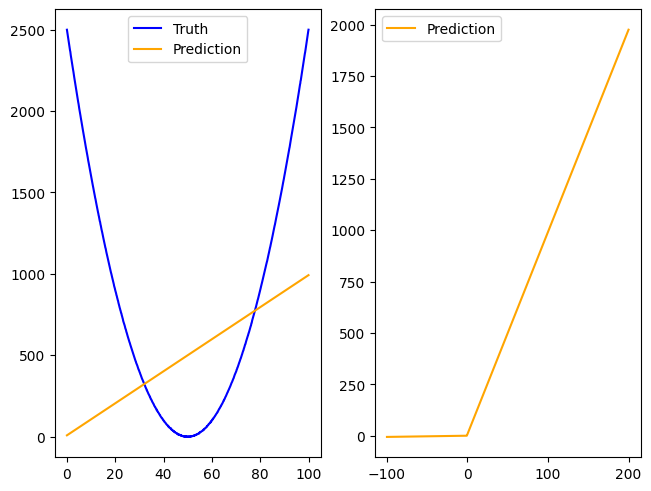

In [8]:
# This is the model that we're going to use in all cases.
# According to the "curve interpretation" of a ReLu activation layer, it can fit the curve piecewise, with 128 segments.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Firsty, try a pretty standard default setup (learning_rate defaults to 0.001)
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(x, y, epochs=10)
plot_fit(model, x)

That sucks.
After some experimentations I found that I could get resonable results with a high learning rate and 100 epochs. Let's try that again...

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 796722.7500 - mse: 796722.7500
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 708385.8125 - mse: 708385.8125
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 655775.3125 - mse: 655775.3125
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 577151.1250 - mse: 577151.1250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 452266.3125 - mse: 452266.3125
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 320331.5938 - mse: 320331.5938
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 251836.1094 - mse: 251836.1094
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 240335.0938 - mse: 240335.0938
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 223021.1562 - mse: 223021.1562
Epoch 10/100
32/32 [==============================] - 0s 3ms/ste

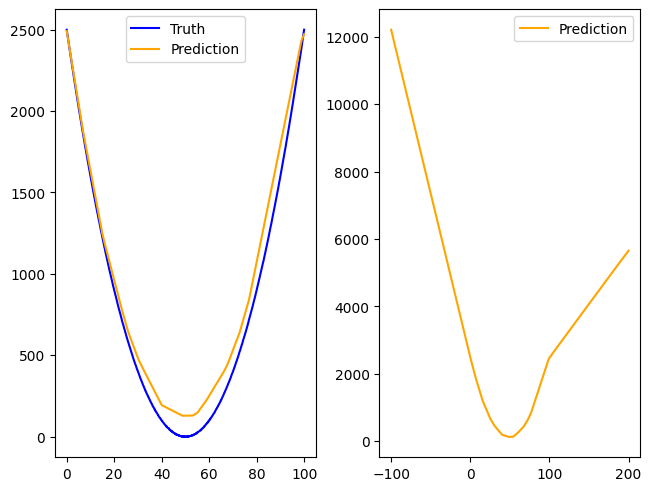

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mse'])
model.fit(x, y, epochs=100)
plot_fit(model, x)

In [ ]:
# WIP
# Let's see what happens if we pre-compute the ideal weights and biases by splitting the curve into 128 discrete segments
#def calculate_ideal(x, y, units)
#  return (weights, biases)
#
#calculate_ideal(x, y, 128)

Now let's try on a harder curve.

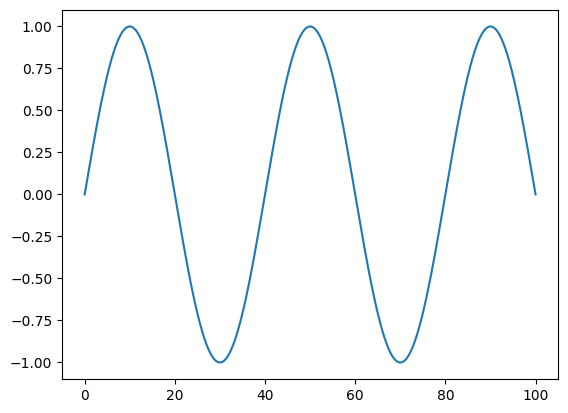

In [10]:
# Define sinusoidal curve to fit
x = np.linspace(0.0, 100.0, 1000)
y = np.sin(x/100.0 * np.pi * 5)
plt.plot(x,y)

With some experimentations, I found that I needed an intermediate learning rate and lots of epochs. And that was only enough to get it to begin to fit the curve. Here I'll show in a couple of training steps.

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.8903 - mse: 3.8903
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5454 - mse: 0.5454
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5287 - mse: 0.5287
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5358 - mse: 0.5358
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6048 - mse: 0.6048
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5282 - mse: 0.5282
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5147 - mse: 0.5147
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5181 - mse: 0.5181
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6028 - mse: 0.6028
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6668 - mse: 0.6668
Epoch 11/100
32/32 [==============================] - 0s 4m

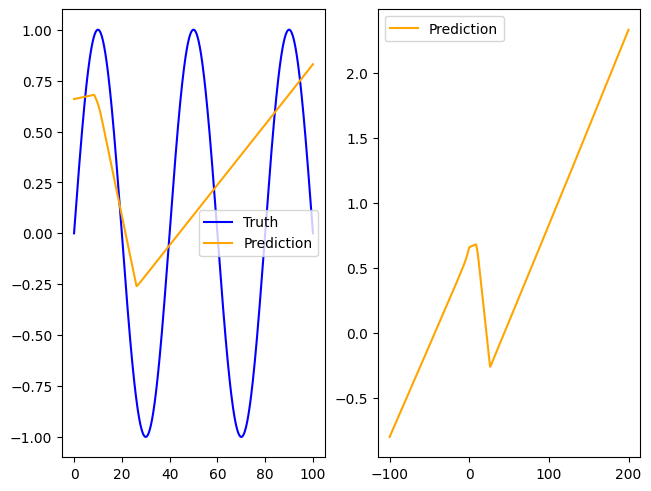

In [11]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
model.fit(x, y, epochs=100)
plot_fit(model, x)

Epoch 1/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3738 - mse: 0.3738
Epoch 2/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3750 - mse: 0.3750
Epoch 3/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3961 - mse: 0.3961
Epoch 4/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3786 - mse: 0.3786
Epoch 5/900
32/32 [==============================] - 0s 3ms/step - loss: 0.4297 - mse: 0.4297
Epoch 6/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3747 - mse: 0.3747
Epoch 7/900
32/32 [==============================] - 0s 3ms/step - loss: 0.4387 - mse: 0.4387
Epoch 8/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3812 - mse: 0.3812
Epoch 9/900
32/32 [==============================] - 0s 3ms/step - loss: 0.4344 - mse: 0.4344
Epoch 10/900
32/32 [==============================] - 0s 3ms/step - loss: 0.3884 - mse: 0.3884
Epoch 11/900
32/32 [==============================] - 0s 3m

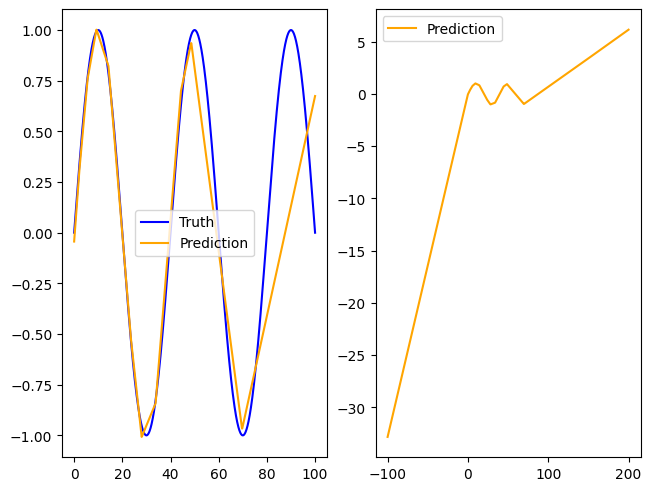

In [12]:
# Let's train for another 900 epochs so that we've done 1,000 epochs in total
model.fit(x, y, epochs=900)
plot_fit(model, x)